<a href="https://colab.research.google.com/github/cosmin004/ML-Courses/blob/main/Convolutional%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = k.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

5


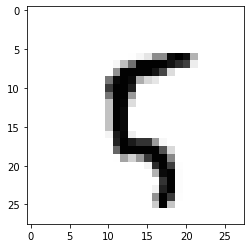

In [5]:
index = 100
print(y_train[index])
plt.imshow(X_train[index], cmap='Greys')

## Normalizing images
In order for the neural network to work well we need to normalize our input data. For images we can do that by dividing the input data by 255. Normally we would do that with some sort of scaler, but in this case, the maximum value for a pixel is 255 and the minimum value is 0(so we can normalize by dividing the input with value = max-min). 

In [6]:
X_train_scaled = X_train.astype('float32')
X_test_scaled = X_test.astype('float32')

X_train_scaled /= 255
X_test_scaled /= 255


In [7]:
X_test_scaled.shape

(10000, 28, 28)

In [8]:
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
X_test_scaled = np.expand_dims(X_test_scaled, axis=3)

In [9]:
X_test_scaled.shape

(10000, 28, 28, 1)

## Building the ANN
Now we will use tensorflow and keras in order to build, train and test a convolutional neural network. We will build the network using the functional API to also view some results of the intermediate layers.

In [10]:
visible = k.layers.Input(shape=(28, 28, 1))
conv1 = k.layers.Conv2D(64, kernel_size=3, activation='relu')(visible)
pool1 = k.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = k.layers.Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = k.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
flat = k.layers.Flatten()(pool2)
hidden1 = k.layers.Dense(100, activation='relu')(flat)
output = k.layers.Dense(10, activation='softmax')(hidden1)
model = k.models.Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)              

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x=X_train_scaled,y=y_train, batch_size=512, epochs=10, validation_split=0.2)

Epoch 1/10
94/94 [==============================] - 56s 591ms/step - loss: 0.4928 - accuracy: 0.8632 - val_loss: 0.1219 - val_accuracy: 0.9661
Epoch 2/10
94/94 [==============================] - 56s 591ms/step - loss: 0.1002 - accuracy: 0.9702 - val_loss: 0.0758 - val_accuracy: 0.9778
Epoch 3/10
94/94 [==============================] - 56s 598ms/step - loss: 0.0696 - accuracy: 0.9784 - val_loss: 0.0624 - val_accuracy: 0.9818
Epoch 4/10
94/94 [==============================] - 56s 595ms/step - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.0537 - val_accuracy: 0.9844
Epoch 5/10
94/94 [==============================] - 56s 591ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0509 - val_accuracy: 0.9843
Epoch 6/10
94/94 [==============================] - 56s 591ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0513 - val_accuracy: 0.9847
Epoch 7/10
94/94 [==============================] - 56s 591ms/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.0446 - val_accuracy: 0.9874

In [13]:
y_train.shape

(60000,)

# Model evaluation

In [14]:
test_scores = model.evaluate(X_test_scaled, y_test, verbose=2)

313/313 - 4s - loss: 0.0395 - accuracy: 0.9878


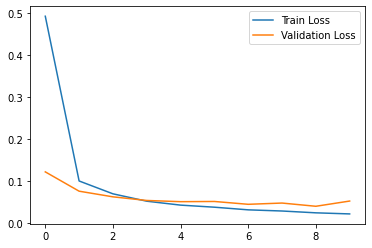

In [15]:
plt.plot(np.arange(0, 10, 1), history.history['loss'], label='Train Loss')
plt.plot(np.arange(0, 10, 1), history.history['val_loss'], label='Validation Loss')
plt.legend()

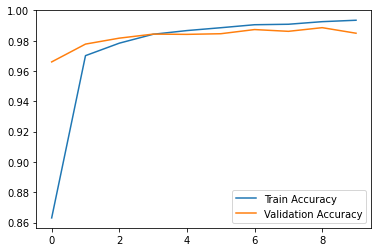

In [16]:
plt.plot(np.arange(0, 10, 1), history.history['accuracy'], label='Train Accuracy')
plt.plot(np.arange(0, 10, 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

# Prediction insights

4


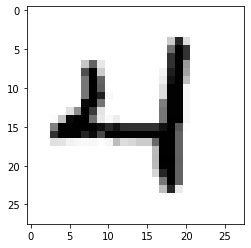

In [17]:
index = 103
print(y_test[index])
plt.imshow(X_test[index], cmap='Greys')

In [18]:
pred = model.predict(np.array([X_test_scaled[index]]))

In [19]:
np.argmax(pred)

4

# Intermediate activations preparation

In [22]:
layer_outputs = [layer.output for layer in model.layers[:5]] 
activation_model = k.models.Model(inputs=model.input, outputs=layer_outputs)

In [24]:
activations = activation_model.predict(np.array([X_test_scaled[index]]))

## First convolution layer

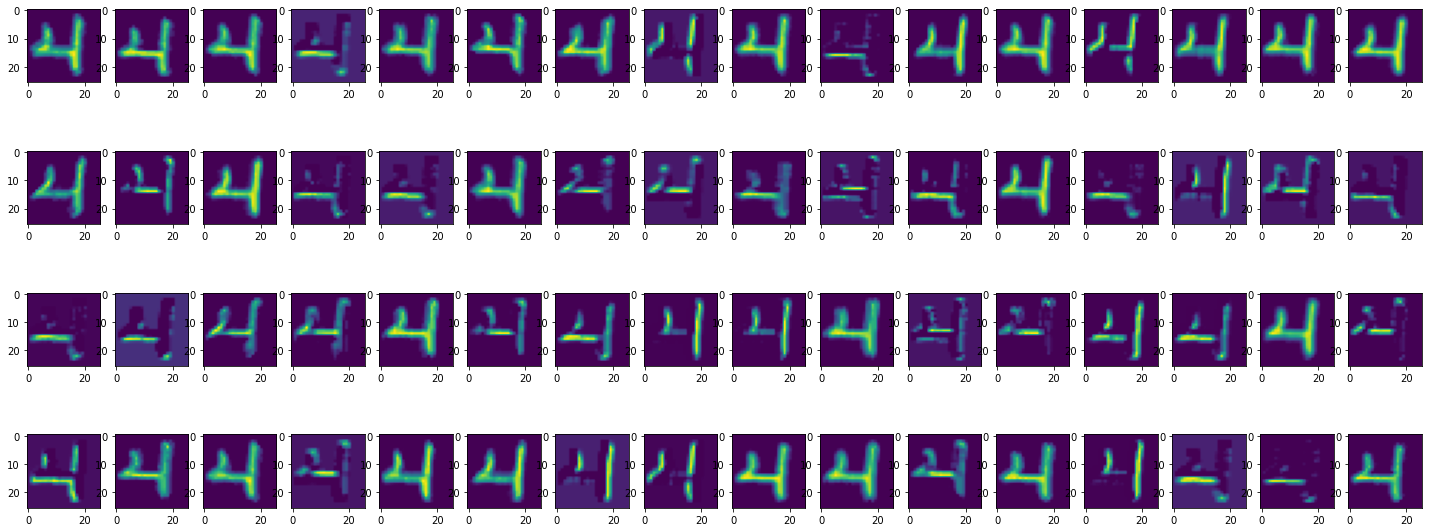

In [25]:
fig, axes = plt.subplots(4, 16, figsize=(25,10))
ix = 0
for ax in axes:
    for ax1 in ax:
        ax1.imshow(activations[1][0,:,:,ix], cmap='viridis')
        ix += 1

## First pooling layer

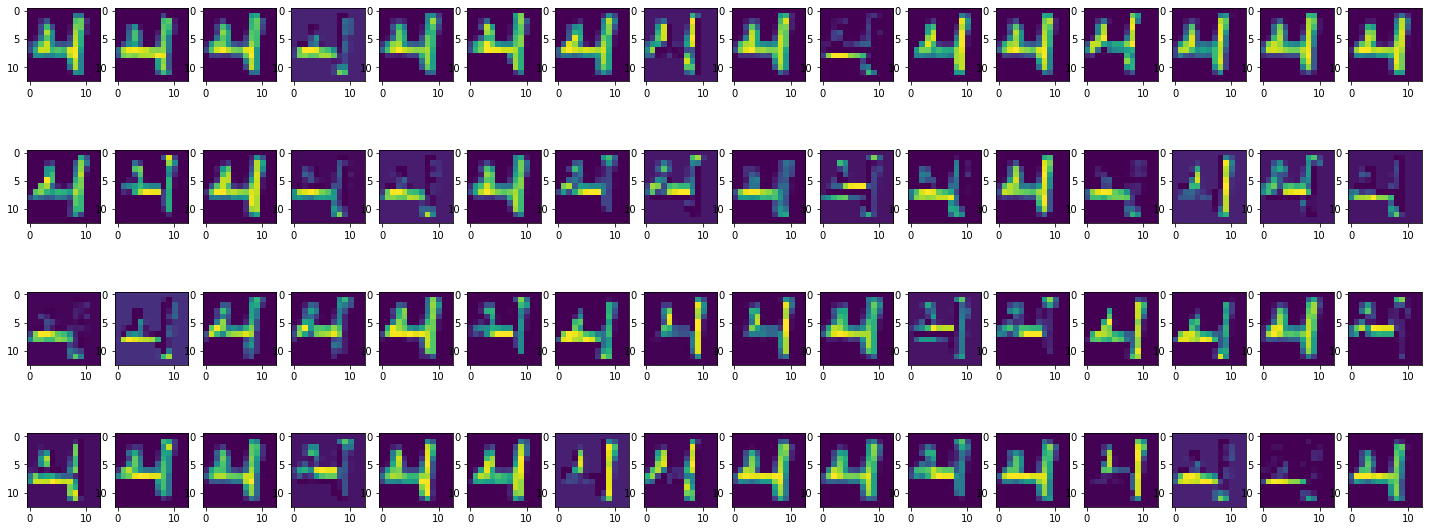

In [26]:
fig, axes = plt.subplots(4, 16, figsize=(25,10))
ix = 0
for ax in axes:
    for ax1 in ax:
        ax1.imshow(activations[2][0,:,:,ix], cmap='viridis')
        ix += 1

## Second conv layer

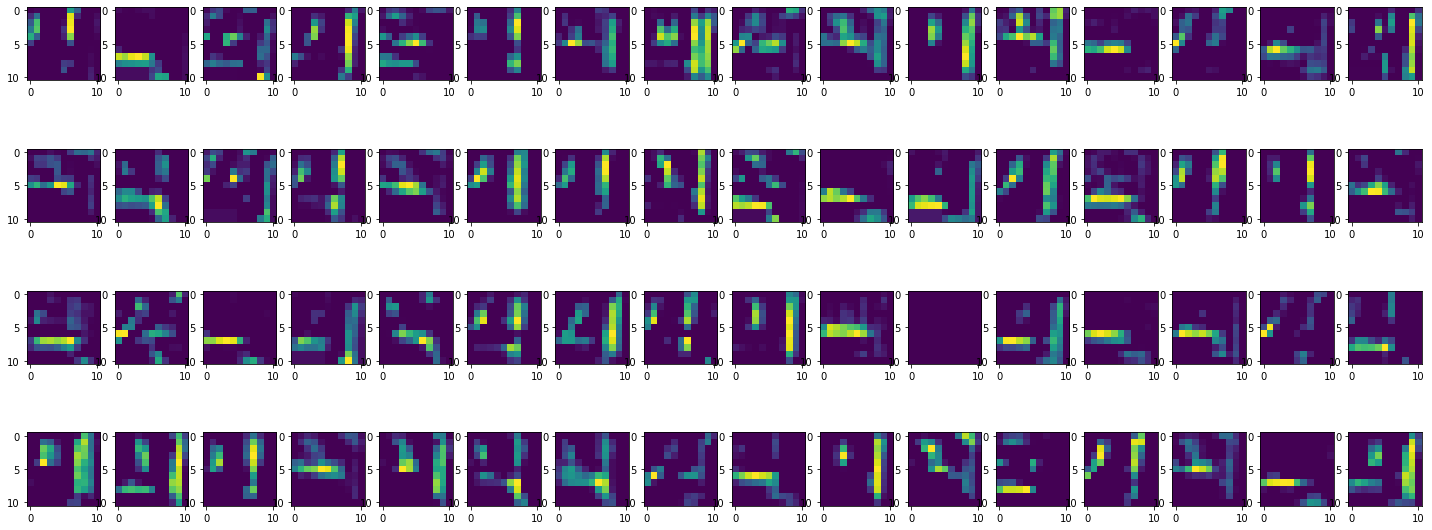

In [27]:
fig, axes = plt.subplots(4, 16, figsize=(25,10))
ix = 0
for ax in axes:
    for ax1 in ax:
        ax1.imshow(activations[3][0,:,:,ix], cmap='viridis')
        ix += 1

## Second pooling layer

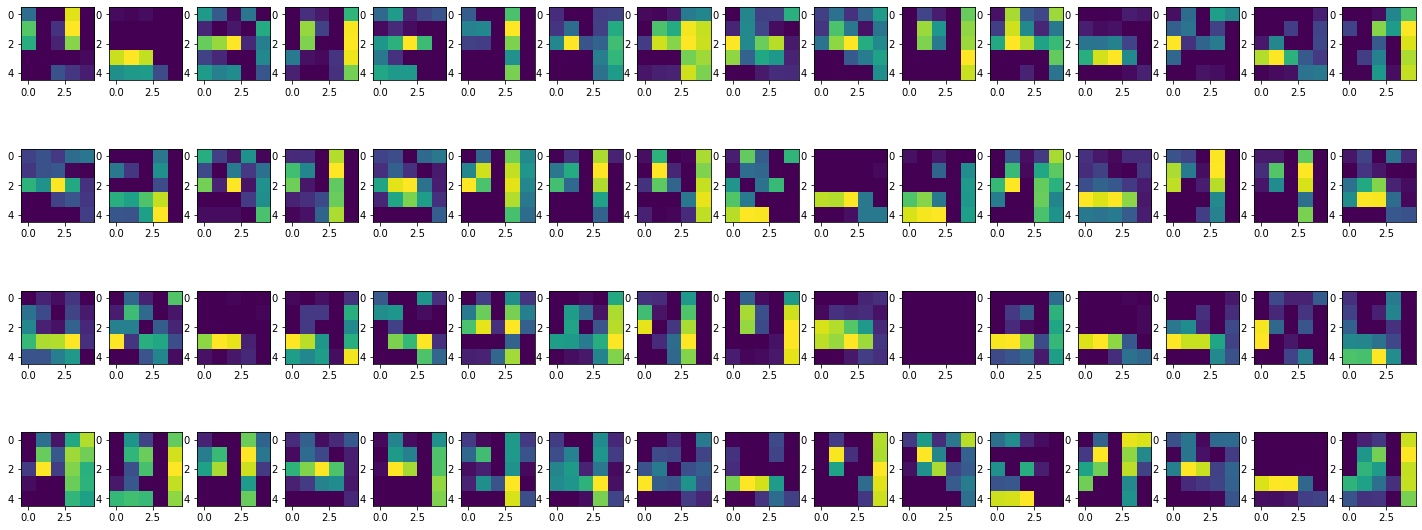

In [28]:
fig, axes = plt.subplots(4, 16, figsize=(25,10))
ix = 0
for ax in axes:
    for ax1 in ax:
        ax1.imshow(activations[4][0,:,:,ix], cmap='viridis')
        ix += 1